# Session 3: Python recap
## Session 3.5: Pandas

Pandas is a package for dealing with tabulated data. It has functions for reading, writing and manipulating data as dataframes. It is a standard tool in Python data science.

In [3]:
import pandas as pd

We load the data and display the first few rows

In [4]:
fn_gapminder = "data/gapminder.csv"
gapminder = pd.read_csv(fn_gapminder, )
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


The describe function gives various stats about the numerical columns

In [28]:
gapminder.describe()

,year,lifeExp,pop,gdpPercap
count,1692.000000,1692.00000,1.692000e+03,1692.000000
mean,1979.500000,59.52389,2.979751e+07,7243.004662
std,17.265365,12.94347,1.065082e+08,9886.643500
min,1952.000000,23.59900,6.001100e+04,241.165877
25%,1965.750000,48.15100,2.828155e+06,1192.603485
50%,1979.500000,60.87350,7.150606e+06,3538.595933
75%,1993.250000,70.87750,1.977102e+07,9380.254270
max,2007.000000,82.60300,1.318683e+09,113523.132900


**We can also call methods to perform actions on individual columns. For example, missing values or `NaN`s are often an issue, so the first thing I do is check for any in our data.**

In [30]:
gapminder.isna().sum()

country      0
continent    0
year         0
lifeExp      0
pop          0
gdpPercap    0
dtype: int64

**Data is selected with the `.loc[rows, columns]` method, though there are some short cuts, such as `table.colname`**.

In [33]:
gapminder.loc[1000:1010, 'lifeExp':'gdpPercap']

,lifeExp,pop,gdpPercap
1000,70.636,527678,7778.414017
1001,73.066,560073,9595.929905
1002,74.101,562548,11222.587620
1003,74.865,569473,11732.510170
1004,75.435,621621,7003.339037
1005,75.445,692651,6465.613349
1006,73.981,720230,6557.194282
1007,74.543,684736,9253.896111
1008,42.873,9939217,1688.203570
1009,45.423,11406350,1642.002314


In [36]:
 gapminder.loc[:, 'lifeExp']

0       28.801
1       30.332
2       31.997
3       34.020
4       36.088
         ...  
1687    62.351
1688    60.377
1689    46.809
1690    39.989
1691    43.487
Name: lifeExp, Length: 1692, dtype: float64

In [37]:
gapminder.lifeExp

0       28.801
1       30.332
2       31.997
3       34.020
4       36.088
         ...  
1687    62.351
1688    60.377
1689    46.809
1690    39.989
1691    43.487
Name: lifeExp, Length: 1692, dtype: float64

**When assiging data to parts of a tableyou must data you must use the long form `.loc[]` method**

In [38]:
gapminder.loc[:, 'someZeros'] = 0
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap,someZeros
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,0
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,0
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,0
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,0
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,0


In [40]:
gapminder.iloc[:, 1:3]

,continent,year
0,Asia,1952
1,Asia,1957
2,Asia,1962
3,Asia,1967
4,Asia,1972
...,...,...
1687,Africa,1987
1688,Africa,1992
1689,Africa,1997
1690,Africa,2002


**More complicated selections are made with boolean masks**

In [41]:
asia_mask = gapminder.continent == 'Asia'
asia_mask

0        True
1        True
2        True
3        True
4        True
        ...  
1687    False
1688    False
1689    False
1690    False
1691    False
Name: continent, Length: 1692, dtype: bool

In [42]:
gapminder.loc[asia_mask, :]

,country,continent,year,lifeExp,pop,gdpPercap,someZeros
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,0
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,0
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,0
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,0
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,0
...,...,...,...,...,...,...,...
1663,Yemen Rep,Asia,1987,52.922,11219340,1971.741538,0
1664,Yemen Rep,Asia,1992,55.599,13367997,1879.496673,0
1665,Yemen Rep,Asia,1997,58.020,15826497,2117.484526,0
1666,Yemen Rep,Asia,2002,60.308,18701257,2234.820827,0


**To get the mean GDP for each continent in 2007 we could use the following loop**

In [43]:
True and False

False

In [47]:
year_mask = gapminder.year == 2007
for continent in gapminder.continent.unique():
    
    selection = gapminder.loc[year_mask & (gapminder.continent == continent)]
    
    print(continent, selection.gdpPercap.mean())


Asia 12473.026870133333
Europe 25054.481635933334
Africa 3078.3752480058815
Americas 11003.031625360001
Oceania 29810.188274999997


**Or we could use Pandas `.groupby()` dataframe method designed for this exact kind of operation**

In [49]:
# Create a group object where rows are groupbed by year and continent values
groups = gapminder.groupby(['year', 'continent'])

# get the mean gdpPercap of each group
year_continent_gdp = groups.gdpPercap.mean()

# display the results for 2007
year_continent_gdp.loc[2007]

continent
Africa       3078.375248
Americas    11003.031625
Asia        12473.026870
Europe      25054.481636
Oceania     29810.188275
Name: gdpPercap, dtype: float64

**Pandas is extremely useful, and will be used throughout this course**. 

Tutorials are available here https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html

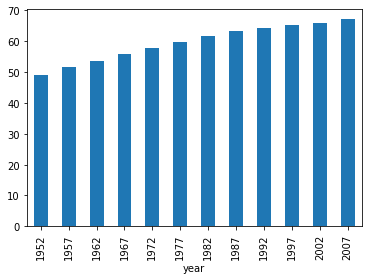

In [54]:
%matplotlib inline
mean_life_exp_year = gapminder.groupby('year').lifeExp.mean()
mean_life_exp_year
mean_life_exp_year.plot(kind='bar')

## Exercise 3.5.1


Re-use the GapMinder dataset to plot, in Jupyter using Matplotlib, a scatter plot of world life expectancy against GDP per capita for 1952 and 2007. Add a title, axis labels and legend to your figure.

## Solution

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

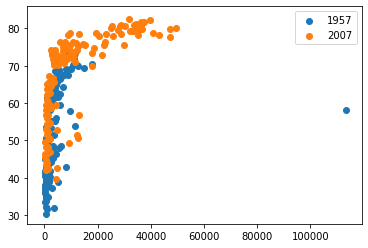

In [6]:
for year in 1957, 2007:
    selection = gapminder.loc[gapminder.year == year]
    plt.scatter(selection.gdpPercap, selection.lifeExp, label=year)
    
    plt.legend()

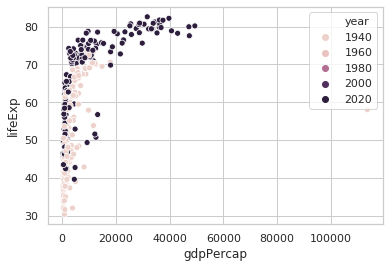

In [7]:
selection_57_07 = gapminder.loc[gapminder.year.isin([1957, 2007])]

sns.scatterplot(x='gdpPercap', y='lifeExp', hue='year', data=selection_57_07)
plt.show()

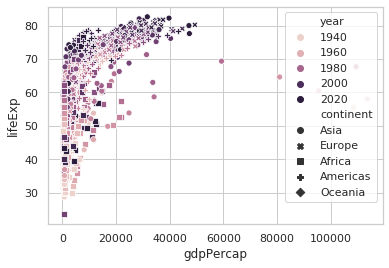

In [8]:
import seaborn as sns
sns.scatterplot(x='gdpPercap', y='lifeExp', hue='year', style='continent', data=gapminder)
plt.show()

# Going further

Because of the length of the session, this Python recap could not cover modules or packages that may be useful to you such as Pandas or Numpy

To learn about csv or Pandas you can go over the Data Science course material which can be found here : https://github.com/pycam/python-data-science
This training material is also done using Jupiter. The README file will get you started. 

To learn about Numpy : https://numpy.org/

You may be interested making your own website. A widely used framework is Django : https://www.djangoproject.com/

You also may want to be able to write test scripts, to test your code and make sure it works. The default python comes with all you need to do this : 
https://docs.python.org/3/library/unittest.html

Finally, you may want to get a different editor for your python work. A very good one is called PyCharm : https://www.jetbrains.com/pycharm/. The free community version is already very good. The professional version is of course even better, though depending on your work you may not need all the fancy features that come with the professional edition.  
